# 1.Download dataset

In [6]:
pip install ucimlrepo

In [7]:
import os
import pandas as pd

In [8]:
if not os.path.isdir("Data"):
    os.mkdir("Data")

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)
X.to_csv("Data/Features.csv",index = False)
y.to_csv("Data/Labels.csv", index = False)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

# 2.Preparing the data sets

## SPLIT TRAIN TEST

In [10]:
from sklearn.model_selection import train_test_split

In [35]:
proportion_train_test = [(0.4,0.6),(0.6,0.4),(0.8,0.2),(0.9,0.1)]
dataset = []

In [12]:
for proportion in proportion_train_test:
    feature_train, feature_test, label_train, label_test = train_test_split(X, y, test_size = proportion[1], random_state=28,stratify=y)
    dataset.append((feature_train, feature_test, label_train, label_test))
    filepath = f"Data/Dataset_{round(proportion[0]*100)}_{round(proportion[1]*100)}"
    if not os.path.isdir(filepath):
        os.mkdir(filepath)
    feature_train.to_csv(f"{filepath}/feature_train_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", index = False)
    label_train.to_csv(f"{filepath}/label_train_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", index = False)
    feature_test.to_csv(f"{filepath}/feature_test_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", index= False)
    label_test.to_csv(f"{filepath}/label_test_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", index = False)

## VISUALIZE ALL CLASSES

In [13]:
import matplotlib.pyplot as plt

In [39]:
filepath = "Charts"
if not os.path.isdir(filepath):
        os.mkdir(filepath)

### 40/60

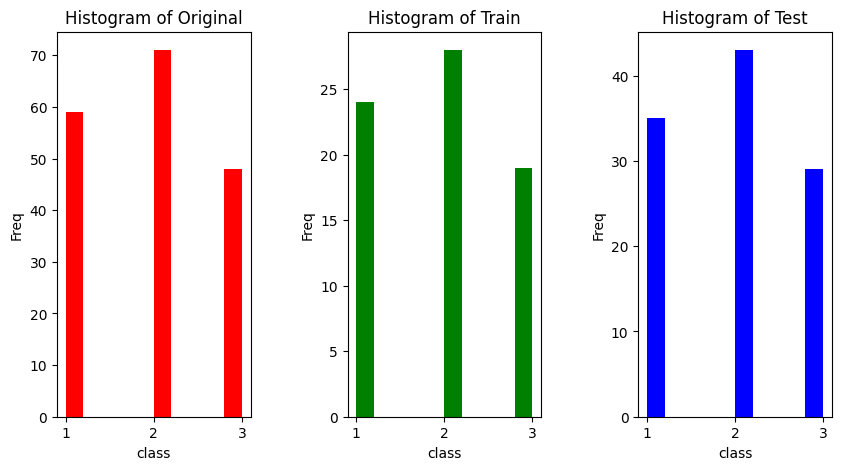

In [40]:
fig, axis = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
axis[0].hist(y, color = 'red')
axis[0].set_title('Histogram of Original')
axis[0].set_xlabel("class")
axis[0].set_ylabel("Freq")
axis[1].hist(dataset[0][2],color = 'green')
axis[1].set_title('Histogram of Train')
axis[1].set_xlabel("class")
axis[1].set_ylabel("Freq")
axis[2].hist(dataset[0][3], color = 'blue')
axis[2].set_title('Histogram of Test')
axis[2].set_xlabel("class")
axis[2].set_ylabel("Freq")
plt.savefig("Charts/chart_40_60")
plt.show()

### 60/40

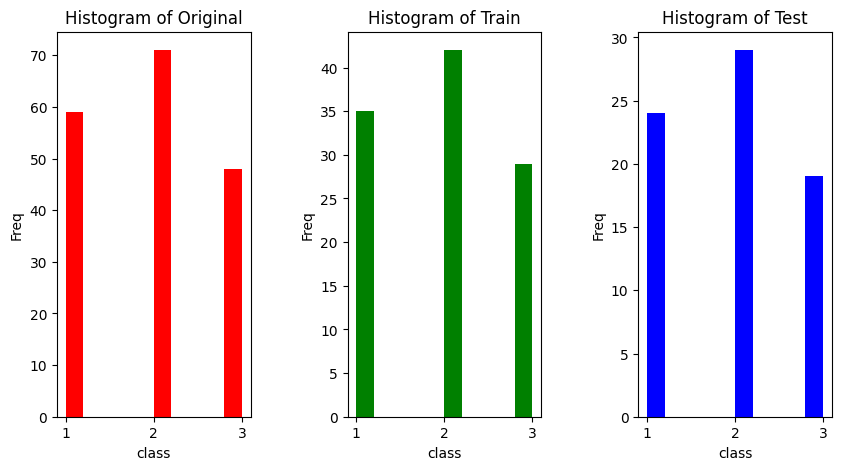

In [41]:
fig, axis = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
axis[0].hist(y, color = 'red')
axis[0].set_title('Histogram of Original')
axis[0].set_xlabel("class")
axis[0].set_ylabel("Freq")
axis[1].hist(dataset[1][2],color = 'green')
axis[1].set_title('Histogram of Train')
axis[1].set_xlabel("class")
axis[1].set_ylabel("Freq")
axis[2].hist(dataset[1][3], color = 'blue')
axis[2].set_title('Histogram of Test')
axis[2].set_xlabel("class")
axis[2].set_ylabel("Freq")
plt.savefig("Charts/chart_60_40")
plt.show()

### 80/20

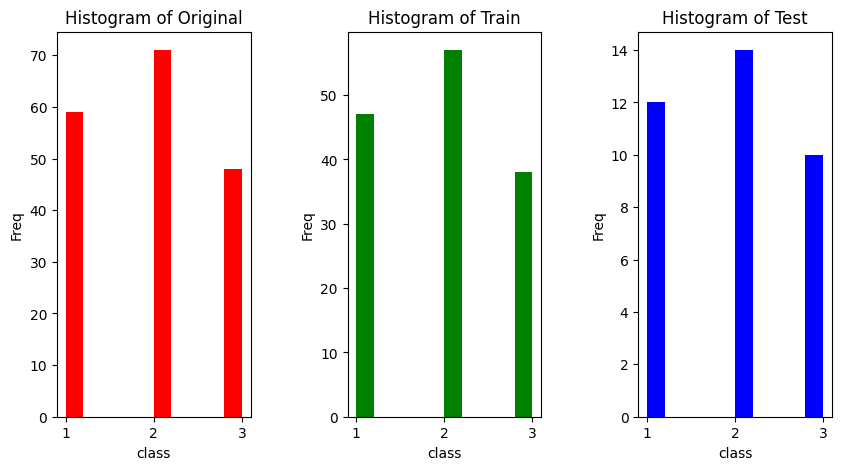

In [42]:
fig, axis = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
axis[0].hist(y, color = 'red')
axis[0].set_title('Histogram of Original')
axis[0].set_xlabel("class")
axis[0].set_ylabel("Freq")
axis[1].hist(dataset[2][2],color = 'green')
axis[1].set_title('Histogram of Train')
axis[1].set_xlabel("class")
axis[1].set_ylabel("Freq")
axis[2].hist(dataset[2][3], color = 'blue')
axis[2].set_title('Histogram of Test')
axis[2].set_xlabel("class")
axis[2].set_ylabel("Freq")
plt.savefig("Charts/chart_80_20")
plt.show()

### 90/10

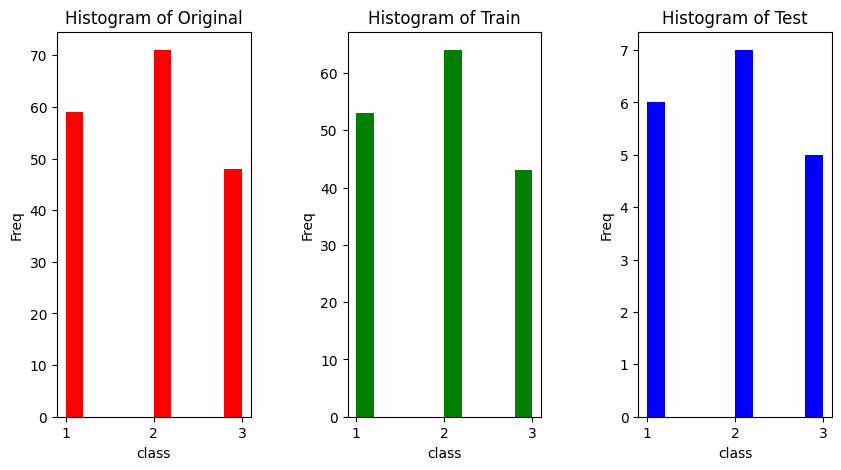

In [43]:
fig, axis = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
axis[0].hist(y, color = 'red')
axis[0].set_title('Histogram of Original')
axis[0].set_xlabel("class")
axis[0].set_ylabel("Freq")
axis[1].hist(dataset[3][2],color = 'green')
axis[1].set_title('Histogram of Train')
axis[1].set_xlabel("class")
axis[1].set_ylabel("Freq")
axis[2].hist(dataset[3][3], color = 'blue')
axis[2].set_title('Histogram of Test')
axis[2].set_xlabel("class")
axis[2].set_ylabel("Freq")
plt.savefig("Charts/chart_90_10")
plt.show()

# 3.Building the decision tree classifiers


## Load dataset

In [37]:
dataset = []

In [38]:
for proportion in proportion_train_test:
    feature_train = pd.read_csv(f"Data/Dataset_{round(proportion[0]*100)}_{round(proportion[1]*100)}/feature_train_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", header='infer')
    feature_test = pd.read_csv(f"Data/Dataset_{round(proportion[0]*100)}_{round(proportion[1]*100)}/feature_test_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", header='infer')
    label_train = pd.read_csv(f"Data/Dataset_{round(proportion[0]*100)}_{round(proportion[1]*100)}/label_train_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", header='infer')
    label_test = pd.read_csv(f"Data/Dataset_{round(proportion[0]*100)}_{round(proportion[1]*100)}/label_test_{round(proportion[0]*100)}_{round(proportion[1]*100)}.csv", header='infer')
    dataset.append((feature_train, feature_test, label_train, label_test))

In [19]:
from sklearn import tree
import graphviz


In [44]:
filepathgraph = "Graph"
if not os.path.isdir(filepathgraph):
    os.mkdir(filepathgraph)



### 40_60 train/test

In [52]:
feature_train, feature_test, label_train, label_test = dataset[0]

In [53]:
clf0 = tree.DecisionTreeClassifier(criterion='entropy')
clf0.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
graph_data = tree.export_graphviz(clf0,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf0.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)

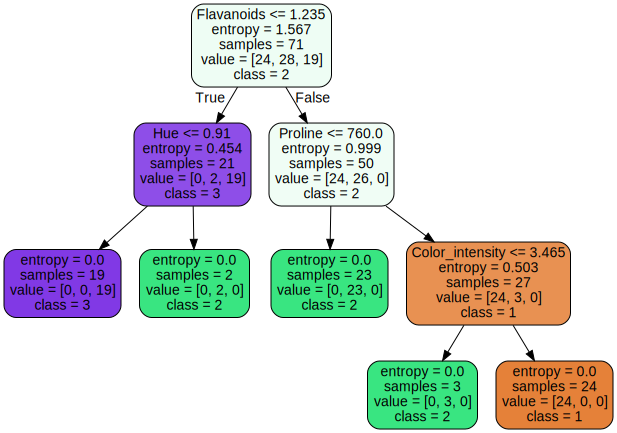

In [55]:
graph

In [56]:
graph.render(filename=f'descision_tree_40_60',format='png',directory = f"{filepathgraph}")

'Graph/descision_tree_40_60.png'

## 60/40 train/test

In [57]:
feature_train, feature_test, label_train, label_test = dataset[1]

In [58]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
clf1.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
graph_data = tree.export_graphviz(clf1,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf1.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)

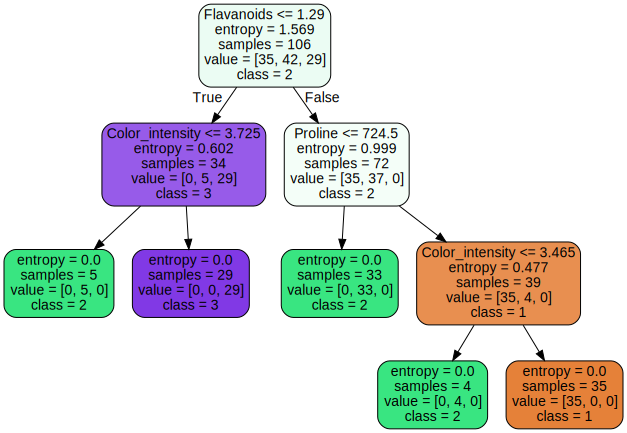

In [60]:
graph

In [61]:
graph.render(filename=f'descision_tree_60_40',format='png',directory = f"{filepathgraph}")

'Graph/descision_tree_60_40.png'

## 80/20 train/test

In [62]:
feature_train, feature_test, label_train, label_test = dataset[2]

In [63]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy')

In [64]:
graph_data = tree.export_graphviz(clf2,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf2.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)

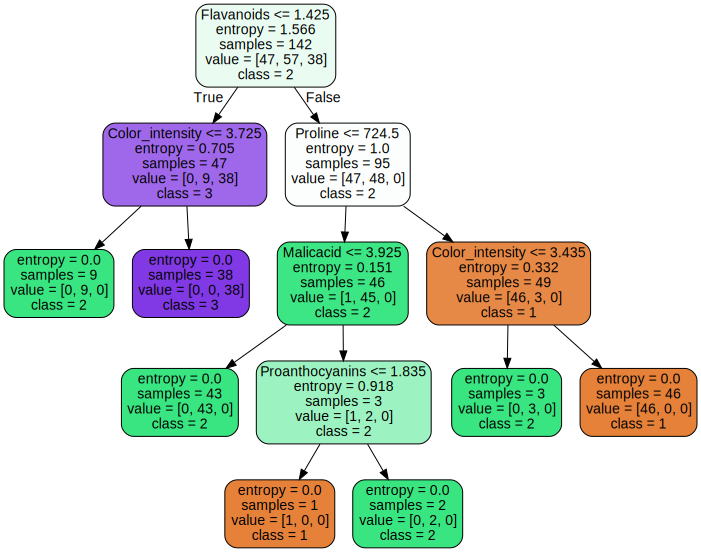

In [65]:
graph

In [66]:
graph.render(filename=f'descision_tree_80_20',format='png',directory = f"{filepathgraph}")

'Graph/descision_tree_80_20.png'

## 90/10 train/test

In [67]:
feature_train, feature_test, label_train, label_test = dataset[3]

In [68]:
clf3 = tree.DecisionTreeClassifier(criterion='entropy')
clf3.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
graph_data = tree.export_graphviz(clf3,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf3.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)

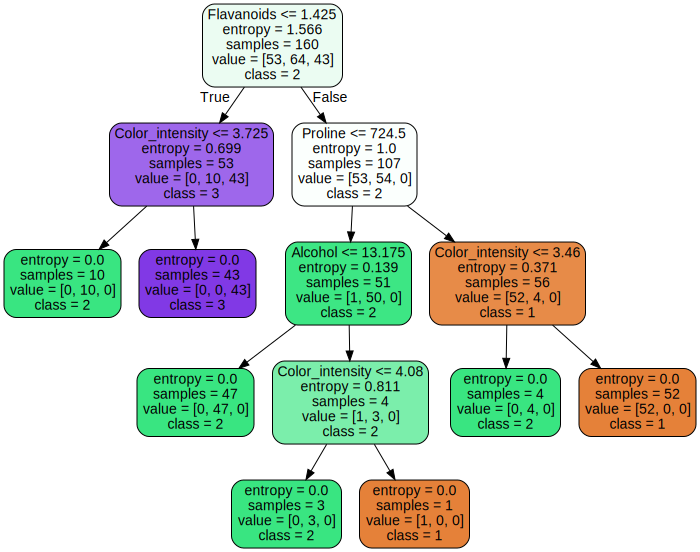

In [70]:
graph

In [71]:
graph.render(filename=f'descision_tree_90_10',format='png',directory = f"{filepathgraph}")

'Graph/descision_tree_90_10.png'

# 4.Evaluating the decision tree classifiers

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [73]:
filepathmatrix = "ConfustionMatrix"
if not os.path.isdir(filepathmatrix):
    os.mkdir(filepathmatrix)

In [74]:
filereport = "ClassificationReport"
if not os.path.isdir(filereport):
    os.mkdir(filereport)

## 40/60

In [75]:
y_predict = clf0.predict(dataset[0][1])
report = classification_report(dataset[0][3],y_predict,  output_dict=True)
result = pd.DataFrame(report).transpose()
result.to_csv(f"{filereport}/40_60.csv")
result

,precision,recall,f1-score,support
1,1.000000,0.914286,0.955224,35.00000
2,0.792453,0.976744,0.875000,43.00000
3,0.954545,0.724138,0.823529,29.00000
accuracy,0.887850,0.887850,0.887850,0.88785
macro avg,0.915666,0.871723,0.884584,107.00000
weighted avg,0.904274,0.887850,0.887291,107.00000


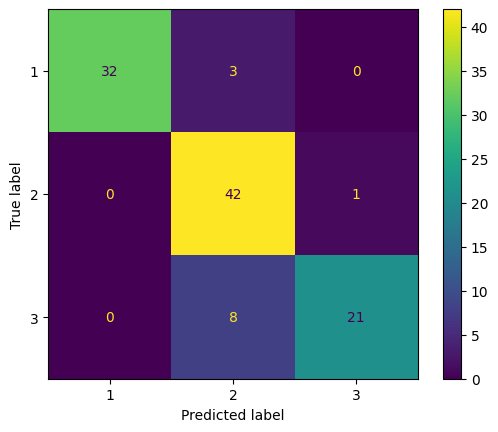

In [76]:
ConfusionMatrixDisplay.from_predictions(dataset[0][3],y_predict,labels = clf0.classes_)
plt.savefig(f"{filepathmatrix}/confusionmaxtrix_40_60")

## 60/40

In [78]:
y_predict = clf1.predict(dataset[1][1])
report = classification_report(dataset[1][3],y_predict, output_dict = True)
result = pd.DataFrame(report).transpose()
result.to_csv(f"{filereport}/60_40.csv")
result

,precision,recall,f1-score,support
1,1.000000,0.958333,0.978723,24.000000
2,0.852941,1.000000,0.920635,29.000000
3,1.000000,0.789474,0.882353,19.000000
accuracy,0.930556,0.930556,0.930556,0.930556
macro avg,0.950980,0.915936,0.927237,72.000000
weighted avg,0.940768,0.930556,0.929896,72.000000


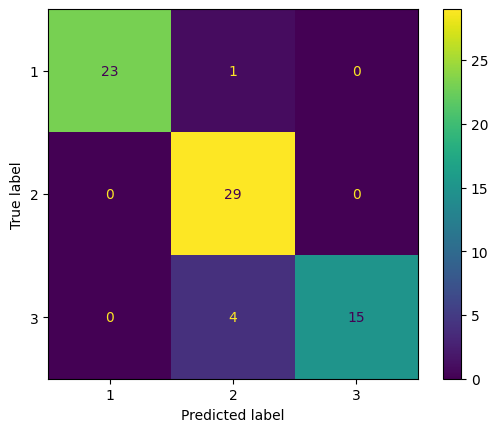

In [79]:
ConfusionMatrixDisplay.from_predictions(dataset[1][3],y_predict,labels = clf1.classes_)
plt.savefig(f"{filepathmatrix}/confusionmaxtrix_60_40")

## 80/20

In [80]:
y_predict = clf2.predict(dataset[2][1])
report = classification_report(dataset[2][3],y_predict, output_dict = True)
result = pd.DataFrame(report).transpose()
result.to_csv(f"{filereport}/80_20.csv")
result

,precision,recall,f1-score,support
1,0.857143,1.000000,0.923077,12.000000
2,0.916667,0.785714,0.846154,14.000000
3,0.900000,0.900000,0.900000,10.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.891270,0.895238,0.889744,36.000000
weighted avg,0.892196,0.888889,0.886752,36.000000


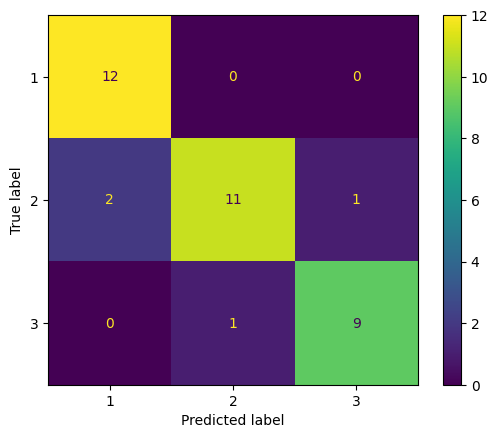

In [81]:
ConfusionMatrixDisplay.from_predictions(dataset[2][3],y_predict,labels = clf2.classes_)
plt.savefig(f"{filepathmatrix}/confusionmaxtrix_80_20")

## 90/10

In [82]:
y_predict = clf3.predict(dataset[3][1])
report = classification_report(dataset[3][3],y_predict, output_dict = True)
result = pd.DataFrame(report).transpose()
result.to_csv(f"{filereport}/90_10.csv")
result

,precision,recall,f1-score,support
1,0.857143,1.000000,0.923077,6.000000
2,1.000000,0.857143,0.923077,7.000000
3,0.800000,0.800000,0.800000,5.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.885714,0.885714,0.882051,18.000000
weighted avg,0.896825,0.888889,0.888889,18.000000


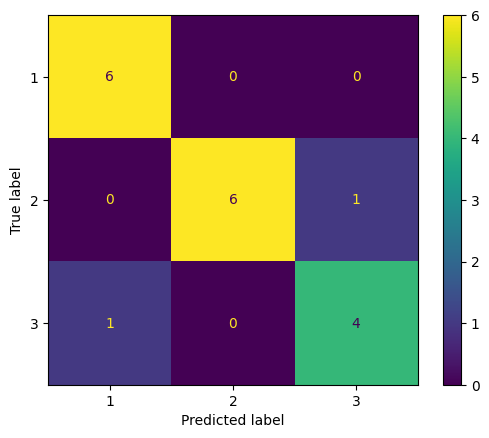

In [83]:
ConfusionMatrixDisplay.from_predictions(dataset[3][3],y_predict,labels = clf3.classes_)
plt.savefig(f"{filepathmatrix}/confusionmaxtrix_90_10")

# 5. The depth and accuracy of a decision tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
feature_train, feature_test, label_train, label_test = dataset[2]

In [ ]:
accuracy = []

In [ ]:
filepathdepth = "MaxDepth"
if not os.path.isdir(filepathdepth):
    os.mkdir(filepathdepth)

## max_depth = None

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.8888888888888888

In [ ]:
accuracy.append(a)

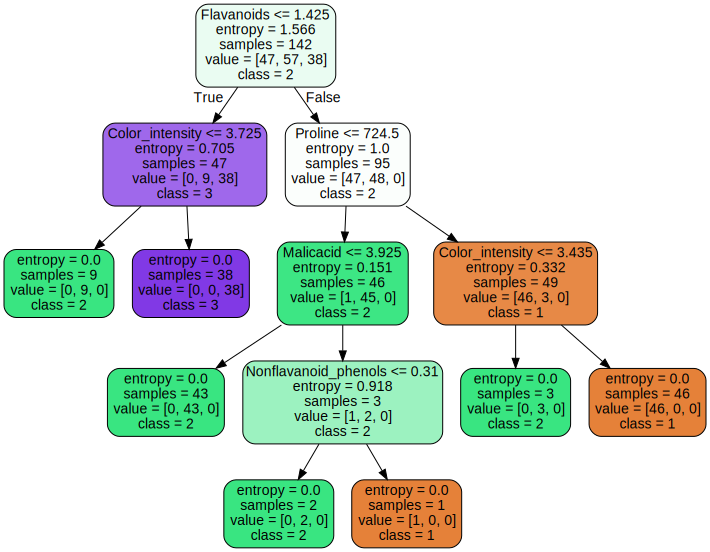

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_None',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 2

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 2)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.9166666666666666

In [ ]:
accuracy.append(a)

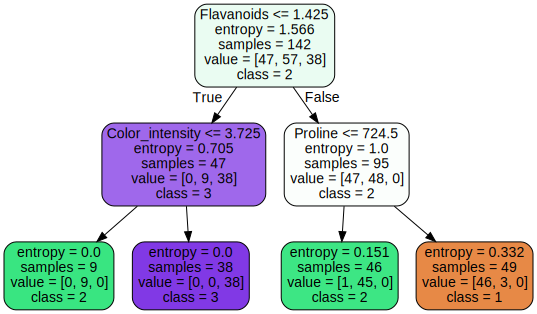

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_2',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 3

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.9444444444444444

In [ ]:
accuracy.append(a)

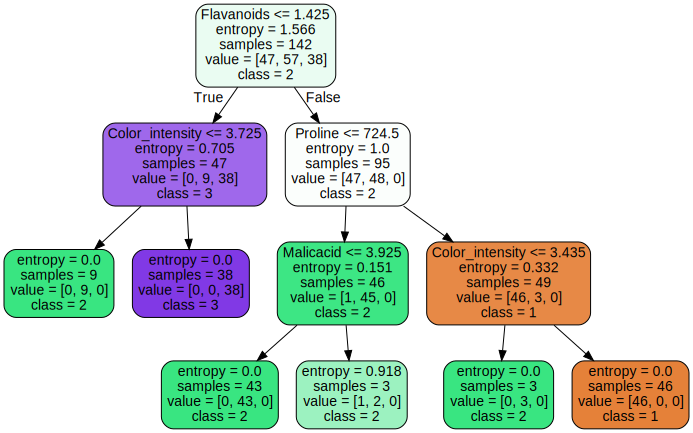

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_3',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 4

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.8888888888888888

In [ ]:
accuracy.append(a)

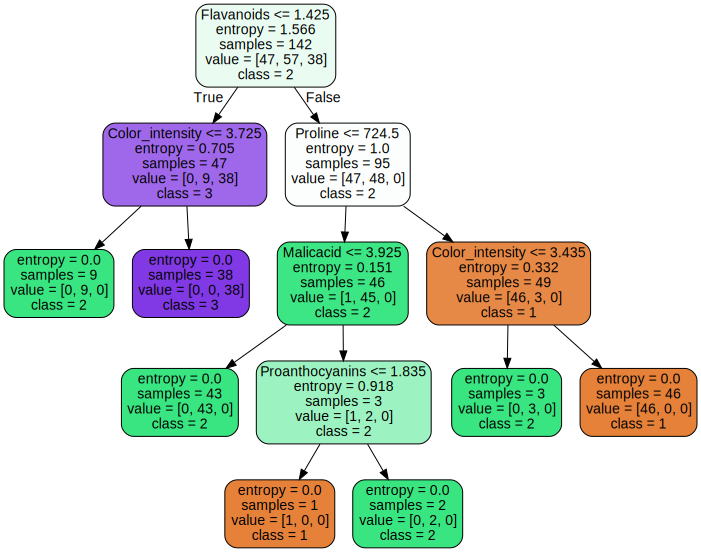

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_4',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 5

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.8888888888888888

In [ ]:
accuracy.append(a)

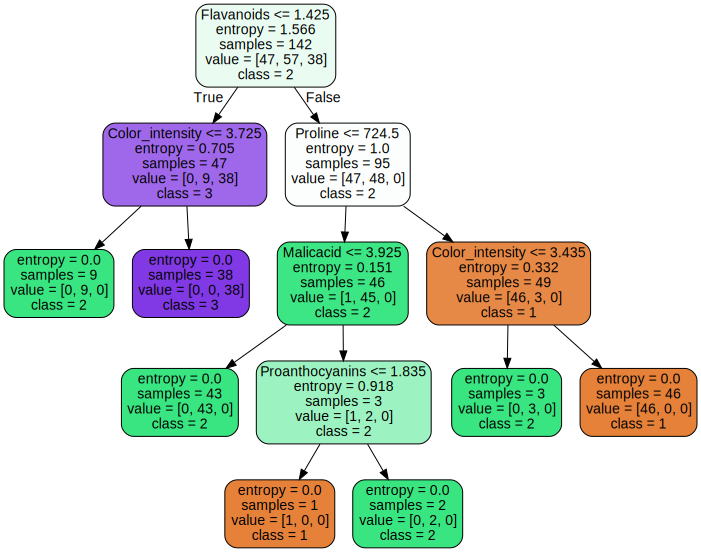

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_5',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 6

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 6)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.8888888888888888

In [ ]:
accuracy.append(a)

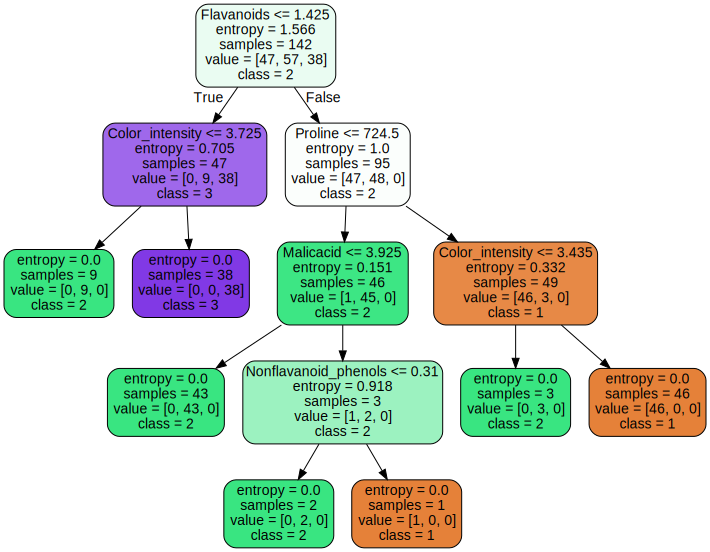

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_6',format='png',directory = f"{filepathdepth}")
graph

## max_depth = 7

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 7)
clf.fit(feature_train,label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
y_predict = clf.predict(feature_test)
a = accuracy_score(label_test,y_predict)
a

0.9444444444444444

In [ ]:
accuracy.append(a)

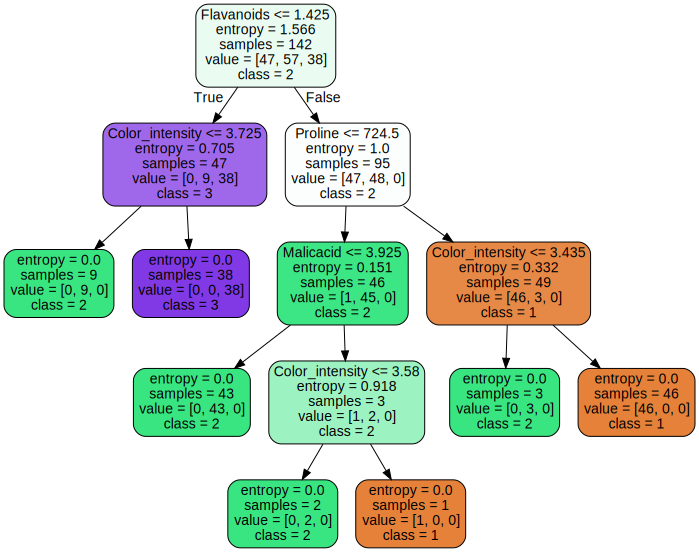

In [ ]:
graph_data = tree.export_graphviz(clf,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=clf.classes_.astype(str)
                            )

graph = graphviz.Source(graph_data)
graph.render(filename=f'descision_tree_7',format='png',directory = f"{filepathdepth}")
graph

In [ ]:
dict_depth = {}
dict_depth["max_depth"]= ["accuracy"]
i = 0
for acc in accuracy:
  if i == 0:
    dict_depth["None"] = [str(acc)]
    i+=2
  else:
    dict_depth[str(i)] = [str(acc)]
    i+=1

In [ ]:
filepathgraph = f"{filepathdepth}/Accuracy_Max_Depth"
if not os.path.isdir(filepathgraph):
    os.mkdir(filepathgraph)

In [ ]:
df = pd.DataFrame(dict_depth)
df.to_csv(f"{filepathgraph}/accuracyTable.csv",index=False)


In [ ]:
df

,max_depth,None,2,3,4,5,6,7
0,accuracy,0.8888888888888888,0.9166666666666666,0.9444444444444444,0.8888888888888888,0.8888888888888888,0.8888888888888888,0.9444444444444444
